In [2]:
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import cm

import geopandas as gpd
import xarray as xr
import regionmask 
import pandas as pd
# import cartopy.crs as ccrs
import os
import math

from pykrige.ok import OrdinaryKriging
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from shapely.geometry import Polygon

import rasterio

In [4]:
fn = 'C:/Users/acer/Documents/_PROJECT/2021-12-21_GSMap/hasil/nc/jabar/2019-02.nc'

ds_gsmap = xr.open_dataarray(fn)
ds_gsmap

<xarray.DataArray 'precipitation' (lat: 142, lon: 32)>
[4544 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 106.0 106.1 106.2 106.2 ... 108.8 108.9 109.0 109.1
  * lat      (lat) float64 -8.55 -8.45 -8.35 -8.25 -8.15 ... 5.25 5.35 5.45 5.55

NameError: name 'lon' is not defined

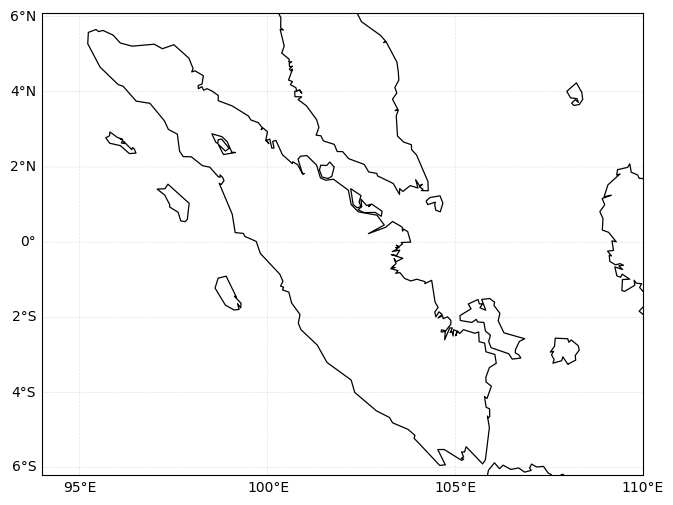

In [6]:
fig, ax = plt.subplots(figsize=(16,6))
# koordinat indonesia
# lon_leftup=90;lat_leftup=9
# lon_rightdown=141;lat_rightdown=-12

# lon_leftup=104;lat_leftup=-5.5
# lon_rightdown=109;lat_rightdown=-8.5

lon_leftup = 94; lat_leftup = 6.1
lon_rightdown = 110; lat_rightdown = -6.2

m = Basemap(projection='cyl', llcrnrlat=lat_rightdown, urcrnrlat=lat_leftup, llcrnrlon=lon_leftup, urcrnrlon=lon_rightdown, resolution='l')
m.drawcoastlines(linewidth=0.9, color='black')
# m.drawcountries(linewidth=0.7,color='black')

parallels = np.arange(-60,80,2)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0.2,dashes=[1,4])
meridians = np.arange(0,200,5)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0.2,dashes=[1,4])

# cdict = ['y',(151 / 255, 250 / 255, 151 / 255), (49/ 255, 204 / 255, 49/ 255), (126/ 255, 191 / 255, 237 / 255)
#     , (0 / 255, 0 / 255, 255 / 255), (237/ 255, 0 / 255, 237 / 255)]
cdict = ['skyblue','green','yellow','orange','red']
my_cmap = colors.ListedColormap(cdict,'pre')
my_cmap.set_under('lightgray')
# my_cmap.set_over((135/ 255, 25 / 255, 25 / 255))
my_cmap.set_over('brown')
# lev=np.array([-60,0.1,10,25,50,100,250])
lev=np.array([0, 0.5, 20, 50, 100, 150])
norm3 = mpl.colors.BoundaryNorm(lev, my_cmap.N)

lons, lats = np.meshgrid(lon,lat)
x, y = m(lons, lats)
pp=m.pcolormesh(x,y,pre,cmap=my_cmap,norm=norm3)

cb=fig.colorbar(pp,ax=ax,pad=0.07,shrink=0.6,aspect=25,orientation='horizontal',extend='both')
cb.set_ticks(lev)
cb.set_ticklabels(lev)
cb.set_label("mm/day")
# cb.set_ticklabels(['ND',0.1,10,25,50,100,250])
# plt.savefig('test.png', dpi=300, bbox_inches='tight')
plt.title("Daily Precipitation Acumulation in 01 January 2021")

plt.show()

In [4]:
file_geo = "E:/PROJECT/SHP/batas-administrasi-indonesia-master/Kecamatan/Kecamatan.shp"
# file_geo = "E:/PROJECT/SHP/BATAS KECAMATAN DESEMBER 2019 DUKCAPIL/BATAS KECAMATAN DESEMBER 2019 DUKCAPIL.shp"

shp_jabar = gpd.read_file(file_geo)
shp_jabar = shp_jabar[shp_jabar.PROVINSI == 'Jawa Barat'].reset_index(drop=True)
shp_jabar

KODE_KEC KODE_KK KODE_PROV       KECAMATAN     KAB_KOTA    PROVINSI   
0    32.18.09   32.18        32     Pangandaran  Pangandaran  Jawa Barat  \
1    32.18.07   32.18        32      Padaherang  Pangandaran  Jawa Barat   
2    32.18.08   32.18        32      Kalipucang  Pangandaran  Jawa Barat   
3    32.18.01   32.18        32          Parigi  Pangandaran  Jawa Barat   
4    32.18.02   32.18        32        Cijulang  Pangandaran  Jawa Barat   
..        ...     ...       ...             ...          ...         ...   
622  32.14.10   32.14        32       Pasawahan   Purwakarta  Jawa Barat   
623  32.14.11   32.14        32          Bojong   Purwakarta  Jawa Barat   
624  32.77.02   32.77        32   Cimahi Tengah  Kota Cimahi  Jawa Barat   
625  32.77.03   32.77        32    Cimahi Utara  Kota Cimahi  Jawa Barat   
626  32.77.01   32.77        32  Cimahi Selatan  Kota Cimahi  Jawa Barat   

          FID                                           geometry  
0    32.18.09  POLYGON Z ((108.67091 -7.68515 0.00000, 108.67...  
1    32.18.07  POLYGON Z ((108.70402 -7.59300 0.00000, 108.70...  
2    32.18.08  POLYGON Z ((108.77649 -7.69946 0.00000, 108.77...  
3    32.18.01  POLYGON Z ((108.53091 -7.69386 0.00000, 108.53...  
4    32.18.02  MULTIPOLYGON Z (((108.50565 -7.77543 0.00000, ...  
..        ...                                                ...  
622  32.14.10  POLYGON Z ((107.45933 -6.59886 0.00000, 107.45...  
623  32.14.11  POLYGON Z ((107.51708 -6.73209 0.00000, 107.51...  
624  32.77.02  POLYGON Z ((107.55666 -6.89006 0.00000, 107.55...  
625  32.77.03  POLYGON Z ((107.57040 -6.87847 0.00000, 107.57...  
626  32.77.01  POLYGON Z ((107.56535 -6.91240 0.00000, 107.56...  

[627 rows x 8 columns]

In [ ]:
# Save the GeoDataFrame to a GeoJSON file
shp_jabar.to_file('./dataset/shp_jabar.geojson', driver='GeoJSON')


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
 

In [15]:
unique_kecamatan = shp_jabar['KODE_KEC'].unique()
print(f"Jumlah unik KECAMATAN: {len(unique_kecamatan)}")

Jumlah unik KECAMATAN: 627


In [ ]:
# list_kecamatan = list(shp_jabar['KECAMATAN'])
list_kecamatan = list(shp_jabar['KODE_KEC'])
indexes = [list_kecamatan.index(x) for x in list_kecamatan]
region_mask_poly = regionmask.Regions(name = 'KECAMATAN', 
                                      numbers = indexes, 
                                      names = shp_jabar.KECAMATAN[indexes], 
                                      outlines = shp_jabar.geometry[indexes], 
                                      overlap=False)
print(len(list_kecamatan))
print(len(indexes))
print(len(region_mask_poly))

627
627
627


In [13]:
a = 0 
for i in indexes:
    # print(shp_jabar.KECAMATAN[indexes])
    a += 1
print(a)

627


In [12]:
len(region_mask_poly)

580

<Axes: >

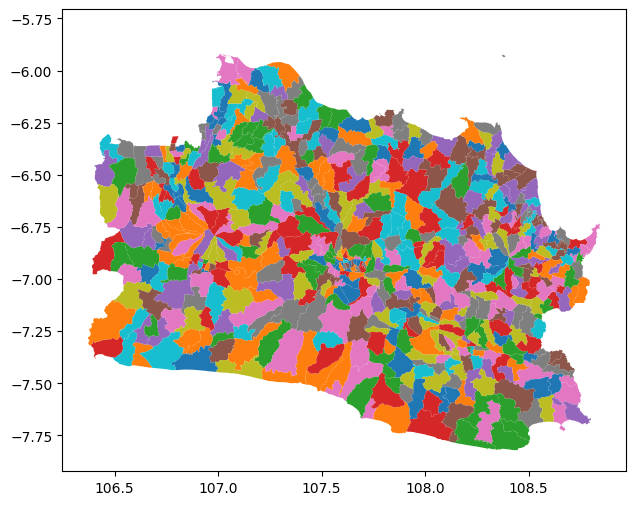

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
shp_jabar.plot(ax = ax, column = 'KECAMATAN')

<Axes: xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>

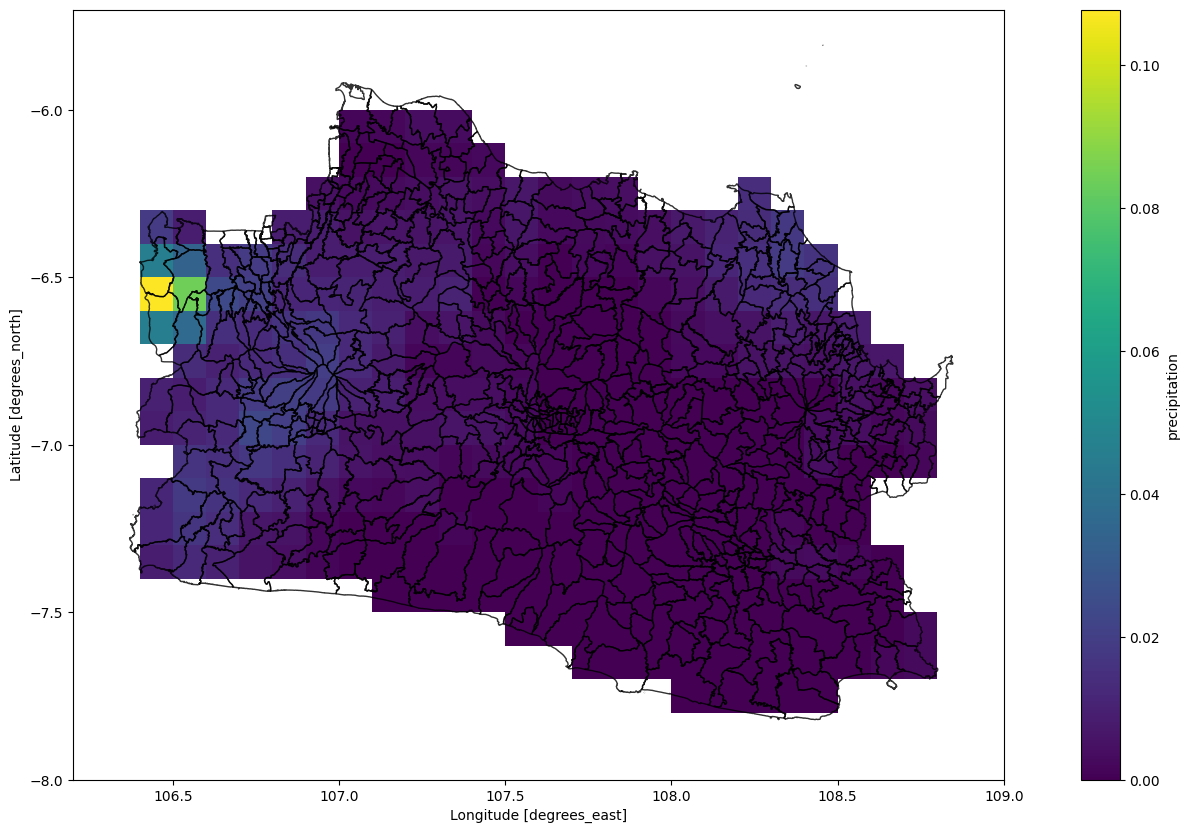

In [21]:
dir_path = r'C:/Users/acer/Documents/_PROJECT/2021-12-21_GSMap/hasil/nc/jabar/'
ds_plot = xr.open_dataarray(dir_path+'2019-06.nc')

# x_min = shp_jabar.bounds.minx.min()
# x_max = shp_jabar.bounds.maxx.max()
# y_min = shp_jabar.bounds.miny.min()
# y_max = shp_jabar.bounds.maxy.max()

# print("awal :", x_min, x_max, y_min, y_max)
x_min = 106.25
x_max = 109
y_max = -5.75
y_min = -8
# print("akhir :", x_min, x_max, y_min, y_max)
ds_plot = ds_plot.where(
            (ds_plot.lat >= y_min) &
            (ds_plot.lat <= y_max) &
            (ds_plot.lon >= x_min) &
            (ds_plot.lon <= x_max), drop=True)

mask = region_mask_poly.mask(ds_plot)
masked_shape = ds_plot.where(mask >= 0)
plt.figure(figsize = (20,10))
ax = plt.axes()

masked_shape.plot(ax = ax)
# ds_plot.plot(ax = ax)
shp_jabar.plot(ax = ax, alpha = 0.8, facecolor = 'none',)


In [17]:
ds_plot.lat.max()

<xarray.DataArray 'lat' ()>
array(-5.75)

In [32]:
list_mean = []
for i in indexes:
    list_mean.append({
        'KAB_KOTA'      : shp_jabar.KAB_KOTA[i],
        'KECAMATAN'     : shp_jabar.KECAMATAN[i],
        'PRECIPITATION' : ds_plot.where(mask == i).mean().values.item(0),
        'TIME'          : '2019-01.nc'.split('.nc')[0]
        # 'KABKOT' : geo_jabar.KABKOT[i],
        # 'geometry' : geo_jabar.geometry[i]
    })
df_mean = pd.DataFrame(list_mean)
df_merge = pd.merge(shp_jabar, df_mean, on = ['KAB_KOTA','KECAMATAN'])
# df_merge.head()
df_merge[df_merge.isnull().any(axis=1)]

index  KODE_KEC KODE_KK KODE_PROV       KECAMATAN     KAB_KOTA   
6      154  32.18.06   32.18        32      Mangunjaya  Pangandaran  \
8      156  32.18.04   32.18        32         Cigugur  Pangandaran   
9      173  32.05.07   32.05        32        Samarang        Garut   
10     174  32.05.08   32.05        32      Pasirwangi        Garut   
11     175  32.05.05   32.05        32  Tarogong Kidul        Garut   
..     ...       ...     ...       ...             ...          ...   
619   6818  32.14.15   32.14        32        Sukasari   Purwakarta   
620   6822  32.14.12   32.14        32    Babakancikao   Purwakarta   
622   6825  32.14.10   32.14        32       Pasawahan   Purwakarta   
624   7146  32.77.02   32.77        32   Cimahi Tengah  Kota Cimahi   
626   7150  32.77.01   32.77        32  Cimahi Selatan  Kota Cimahi   

       PROVINSI       FID                                           geometry   
6    Jawa Barat  32.18.06  POLYGON Z ((108.71594 -7.50845 0.00000, 108.71...  \
8    Jawa Barat  32.18.04  POLYGON Z ((108.44749 -7.64158 0.00000, 108.44...   
9    Jawa Barat  32.05.07  POLYGON Z ((107.83286 -7.22927 0.00000, 107.83...   
10   Jawa Barat  32.05.08  POLYGON Z ((107.77735 -7.23643 0.00000, 107.77...   
11   Jawa Barat  32.05.05  POLYGON Z ((107.87632 -7.24172 0.00000, 107.87...   
..          ...       ...                                                ...   
619  Jawa Barat  32.14.15  POLYGON Z ((107.29515 -6.62272 0.00000, 107.29...   
620  Jawa Barat  32.14.12  POLYGON Z ((107.44659 -6.51589 0.00000, 107.44...   
622  Jawa Barat  32.14.10  POLYGON Z ((107.45933 -6.59886 0.00000, 107.45...   
624  Jawa Barat  32.77.02  POLYGON Z ((107.55666 -6.89006 0.00000, 107.55...   
626  Jawa Barat  32.77.01  POLYGON Z ((107.56535 -6.91240 0.00000, 107.56...   

     PRECIPITATION     TIME  
6              NaN  2019-01  
8              NaN  2019-01  
9              NaN  2019-01  
10             NaN  2019-01  
11             NaN  2019-01  
..             ...      ...  
619            NaN  2019-01  
620            NaN  2019-01  
622            NaN  2019-01  
624            NaN  2019-01  
626            NaN  2019-01  

[363 rows x 11 columns]

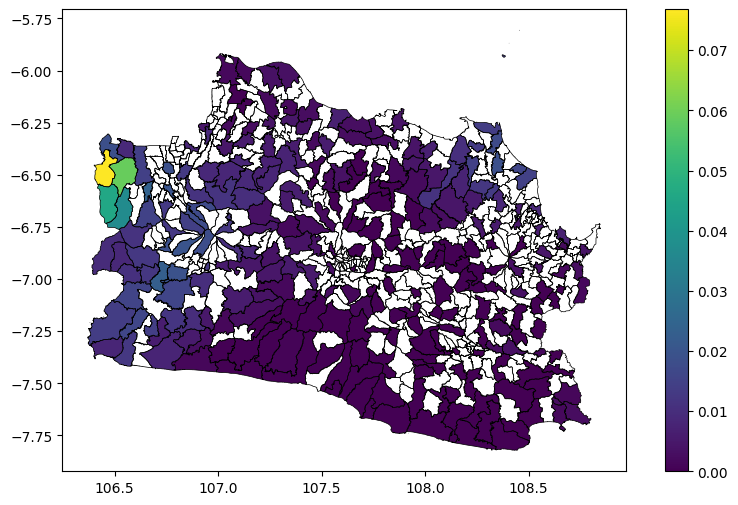

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
shp_jabar.boundary.plot(ax=ax, linewidth=0.5, color='black')

df_merge.plot(column='PRECIPITATION',
           ax=ax,
           legend=True, 
           )

plt.show()

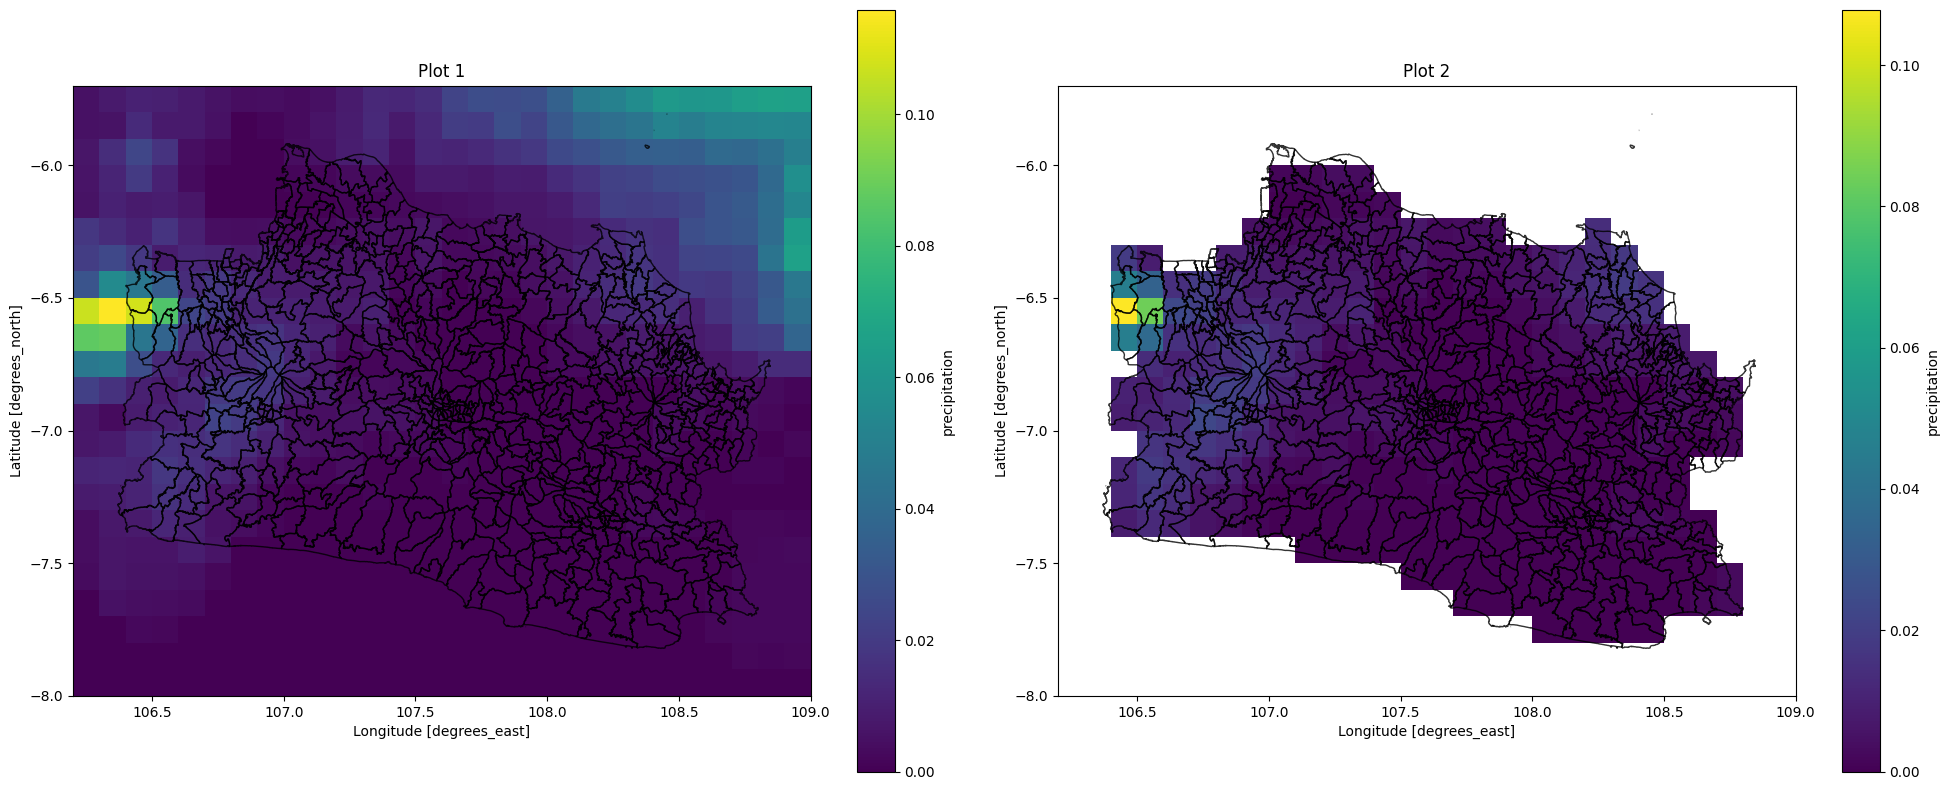

In [18]:
# Membuat figur dengan 2 kolom dan 1 baris
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Memplot grafik pertama
ds_plot.plot(ax=ax1)
shp_jabar.plot(ax=ax1, alpha=0.8, facecolor='none')
ax1.set_title("Plot 1")

# Memplot grafik kedua
masked_shape.plot(ax=ax2)
shp_jabar.plot(ax=ax2, alpha=0.8, facecolor='none')
ax2.set_title("Plot 2")

# Menambahkan layout yang lebih baik
plt.tight_layout()

# Menampilkan plot
plt.show()

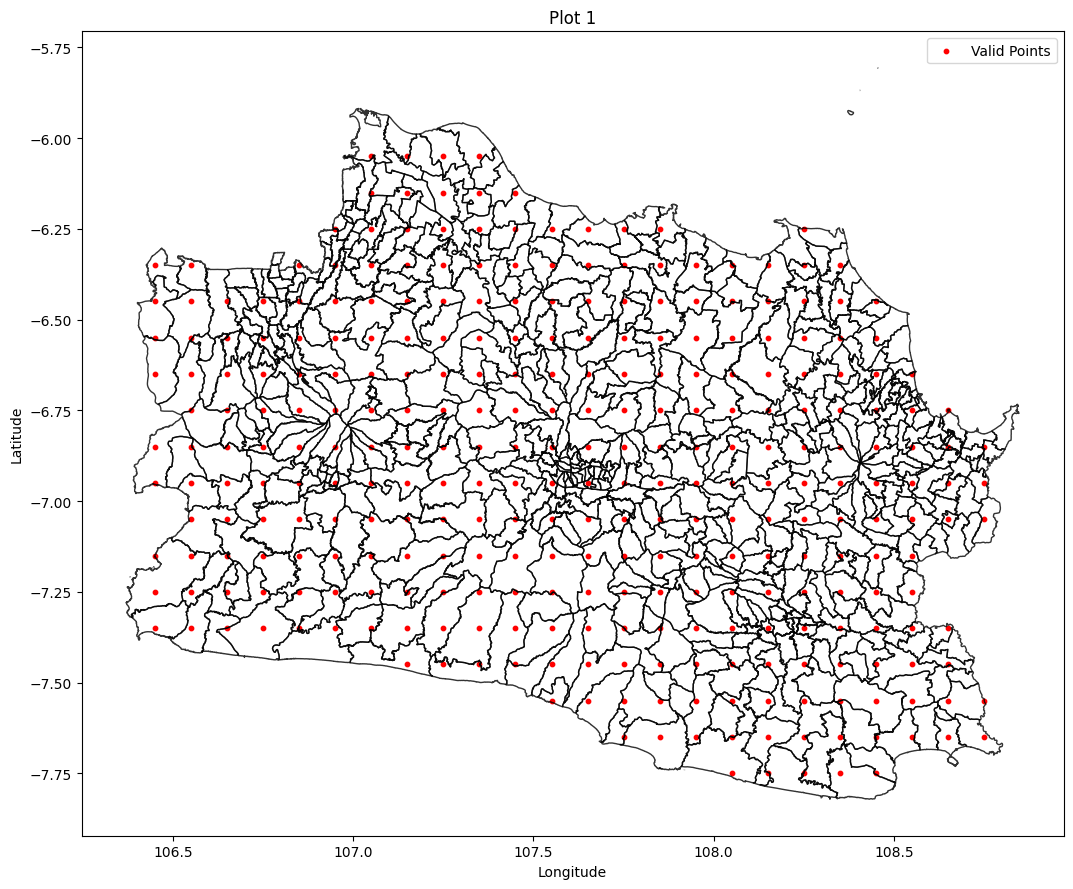

In [19]:
plt.figure(figsize = (16,9))
ax = plt.axes()

# Memplot grafik pertama dengan titik dari masked_shape
# Extract valid coordinates from the masked_shape
valid_indices = np.argwhere(~np.isnan(masked_shape.values))  # Get indices of valid data
valid_lons = masked_shape.lon.values[valid_indices[:, 1]]  # Longitude of valid points
valid_lats = masked_shape.lat.values[valid_indices[:, 0]]   # Latitude of valid points

# valid_indices = np.argwhere(~np.isnan(ds_plot.values))
# valid_lons = ds_plot.lon.values[valid_indices[:, 1]]  # Longitude of valid points
# valid_lats = ds_plot.lat.values[valid_indices[:, 0]]   # Latitude of valid points

# Scatter plot the valid points
ax.scatter(valid_lons, valid_lats, color='red', marker='o', s=10, label='Valid Points')

# Edge boundaries plotting
shp_jabar.plot(ax=ax, alpha=0.8, facecolor='none')
ax.set_title("Plot 1")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Optional: Add legend
ax.legend()


# If you have something to plot in ax2, do it here.

# Show the plots
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [ ]:
np.argwhere(~np.isnan(ds_plot.values))

PERCOBAAN KRIGING

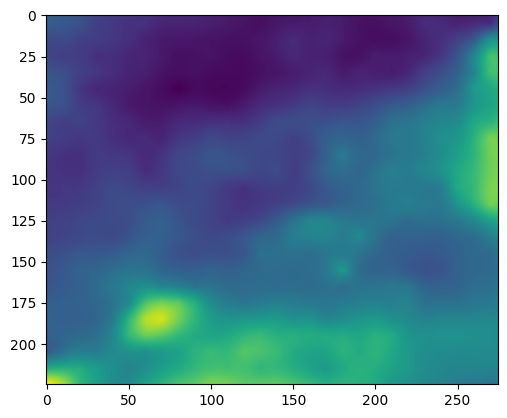

In [56]:
dir_path = r'../../hasil/nc/jabar/'
ds_gsmap = xr.open_dataarray(dir_path+'2019-01.nc')

x_min = 106.25
x_max = 109
y_max = -5.75
y_min = -8
ds_gsmap = ds_gsmap.where(
            (ds_gsmap.lat >= y_min) &
            (ds_gsmap.lat <= y_max) &
            (ds_gsmap.lon >= x_min) &
            (ds_gsmap.lon <= x_max), drop=True)

ds_gsmap = ds_gsmap.to_dataframe()
ds_gsmap.reset_index(inplace=True)

ds_gsmap_np = ds_gsmap[['lat','lon','precipitation']].to_numpy()

# define new lat lon with new resolution
new_res = 0.01
gridx = np.arange(x_min,x_max, new_res)
gridy = np.arange(y_min,y_max, new_res)

OK = OrdinaryKriging(ds_gsmap_np[:, 1], ds_gsmap_np[:, 0], ds_gsmap_np[:, 2], variogram_model='exponential', enable_plotting=False)
z1, ss1 = OK.execute('grid', gridx, gridy)  

plt.imshow(z1)
plt.show()

In [24]:
# len(z1[z1.mask == False])
z1[0][20]

0.4591105302089788

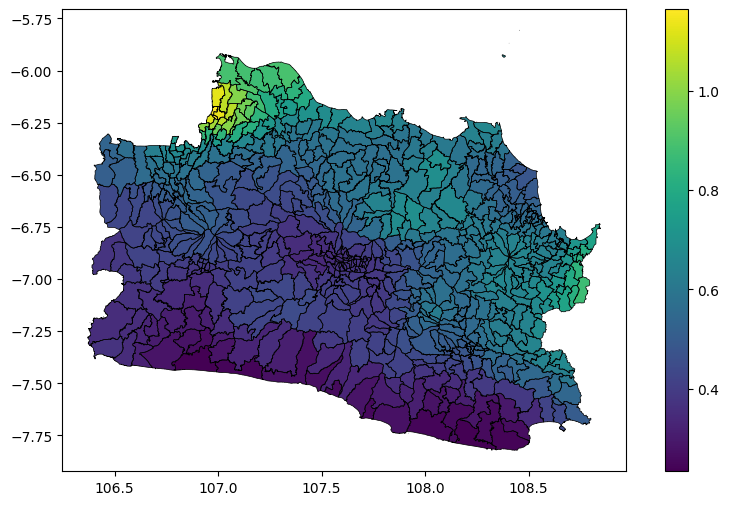

In [57]:
# store new data from kriging into list

list_kriging = []
for a in range(0,len(gridy)):
    for b in range(0,len(gridx)):
        # if ds_gsmap_np[:, 2].mean() != 0:
        #     precip = z1[a][b]
        #     if precip < 0:
        #         precip = 0
        # else:
        #     precip = 0
        precip = z1[a][b]
        list_kriging.append({
            'lat'     : gridy[a],
            'lon'     : gridx[b],
            'precip'  : precip,
            })
        
ds_kriging = pd.DataFrame(list_kriging)
ds_kriging = ds_kriging.set_index(["lat", "lon"])
ds_kriging = ds_kriging.to_xarray()

# apply masking for netcdf
mask = region_mask_poly.mask(ds_kriging, lon_name='lon', lat_name='lat')

list_mean = []
for i in indexes:
    list_mean.append({
        'KAB_KOTA'      : shp_jabar.KAB_KOTA[i],
        'KECAMATAN'     : shp_jabar.KECAMATAN[i],
        'PRECIPITATION' : ds_kriging.where(mask == i).mean().precip.values.item(0),
        'TIME'          : '2019-01.nc'.split('.nc')[0]
        # 'KABKOT' : geo_jabar.KABKOT[i],
        # 'geometry' : geo_jabar.geometry[i]
    })

df_merge = pd.merge(shp_jabar, pd.DataFrame(list_mean), on = ['KAB_KOTA','KECAMATAN'])
# df_merge.head()

fig, ax = plt.subplots(figsize=(10, 6))
shp_jabar.boundary.plot(ax=ax, linewidth=0.5, color='black')

df_merge.plot(column='PRECIPITATION',
           ax=ax,
           legend=True, 
           )

plt.show()


In [52]:
ds_kriging.where(mask == 100).mean().precip.values.item(0)

0.43181147815242826

<Axes: xlabel='lon', ylabel='lat'>

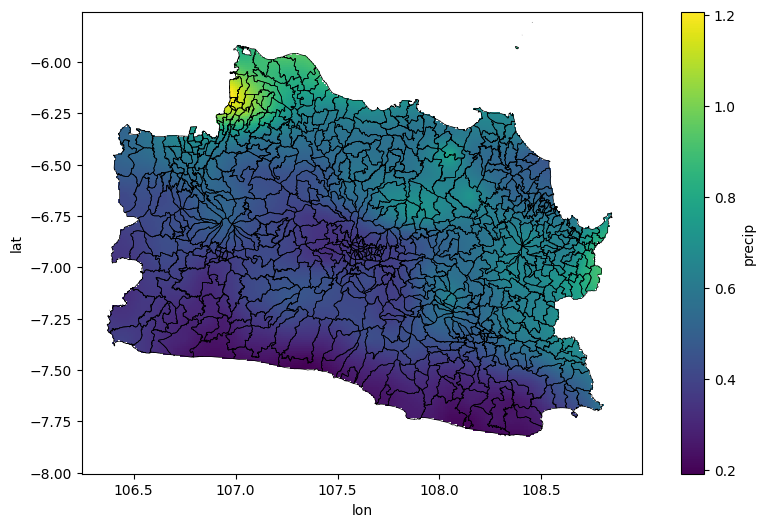

In [59]:
masked_shape = ds_kriging.precip.where(mask >= 0)
plt.figure(figsize = (10,6))
ax = plt.axes()

masked_shape.plot(ax = ax)
shp_jabar.boundary.plot(ax=ax, linewidth=0.5, color='black')

In [34]:
df_mean = pd.DataFrame(list_mean)
df_mean[df_mean.isnull().any(axis=1)]

KAB_KOTA     KECAMATAN  PRECIPITATION     TIME
81     Kota Cirebon     Pekalipan            NaN  2019-01
82     Kota Cirebon      Kejaksan            NaN  2019-01
391         Cirebon          Weru            NaN  2019-01
510    Kota Bandung         Andir            NaN  2019-01
513    Kota Bandung  Astana Anyar            NaN  2019-01
...             ...           ...            ...      ...
14503  Kota Cirebon      Kejaksan            NaN  2020-12
14812       Cirebon          Weru            NaN  2020-12
14931  Kota Bandung         Andir            NaN  2020-12
14934  Kota Bandung  Astana Anyar            NaN  2020-12
14946  Kota Bandung      Antapani            NaN  2020-12

[144 rows x 4 columns]

RUN KRIGING

In [ ]:
# store new data from kriging into list
dir_path = r'C:/Users/acer/Documents/_PROJECT/2021-12-21_GSMap/hasil/nc/jabar/'
# idx = 0
list_mean = []
list_kriging = []
list_mean = []

max_precip = 0
# Iterate directory
for file_path in sorted(os.listdir(dir_path)):
    ds_gsmap = xr.open_dataarray(dir_path+file_path)

    x_min = 106.25
    x_max = 109
    y_max = -5.75
    y_min = -8
    ds_gsmap = ds_gsmap.where(
                (ds_gsmap.lat >= y_min) &
                (ds_gsmap.lat <= y_max) &
                (ds_gsmap.lon >= x_min) &
                (ds_gsmap.lon <= x_max), drop=True)

    ds_gsmap = ds_gsmap.to_dataframe()
    ds_gsmap.reset_index(inplace=True)

    # if max_precip < ds_gsmap['precipitation'].max():
    #     max_precip = ds_gsmap['precipitation'].max()

    ds_gsmap_np = ds_gsmap[['lat','lon','precipitation']].to_numpy()

    # define new lat lon with new resolution
    new_res = 0.01
    gridx = np.arange(x_min,x_max, new_res)
    gridy = np.arange(y_min,y_max, new_res)

    OK = OrdinaryKriging(ds_gsmap_np[:, 1], ds_gsmap_np[:, 0], ds_gsmap_np[:, 2], variogram_model='exponential', enable_plotting=False)
    z1, ss1 = OK.execute('grid', gridx, gridy)                      
    for a in range(0,len(gridy)):
        for b in range(0,len(gridx)):
            # if ds_gsmap_np[:, 2].mean() != 0:
            #     precip = z1[a][b]
            #     if precip < 0:
            #         precip = 0
            # else:
            #     precip = 0
            precip = z1[a][b]
            list_kriging.append({
                'lat'     : gridy[a],
                'lon'     : gridx[b],
                'precip'  : precip,
                })
            
    ds_kriging = pd.DataFrame(list_kriging)
    # ds_kriging = ds_kriging.set_index(["lat", "lon"])
    ds_kriging = ds_kriging.to_xarray()

    # apply masking for netcdf
    mask = region_mask_poly.mask(ds_kriging, lon_name='lon', lat_name='lat')
    for i in indexes:
        list_mean.append({
            'KAB_KOTA'      : shp_jabar.KAB_KOTA[i],
            'KECAMATAN'     : shp_jabar.KECAMATAN[i],
            'PRECIPITATION' : ds_kriging.where(mask == i).mean().precip.values.item(0),
            'TIME'          : file_path.split('.nc')[0]
            # 'KABKOT' : geo_jabar.KABKOT[i],
            # 'geometry' : geo_jabar.geometry[i]
        })

    print(file_path)
print(max_precip)

2019-01.nc
2019-02.nc
2019-03.nc
2019-04.nc
2019-05.nc
2019-06.nc
2019-07.nc
2019-08.nc
2019-09.nc
2019-10.nc
2019-11.nc
2019-12.nc
2020-01.nc
2020-02.nc
2020-03.nc
2020-04.nc
2020-05.nc
2020-06.nc
2020-07.nc
2020-08.nc
2020-09.nc
2020-10.nc
2020-11.nc
2020-12.nc
1.9038536548614502


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
 

In [68]:
df = pd.DataFrame(list_mean)
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [KAB_KOTA, KECAMATAN, PRECIPITATION, TIME]
Index: []

In [65]:
# Calculate mean of PRECIPITATION for each KAB_KOTA
mean_precipitation = df.groupby('KAB_KOTA')['PRECIPITATION'].mean()

# Fill NaN values in PRECIPITATION with the respective mean
df['PRECIPITATION'] = df['PRECIPITATION'].fillna(df['KAB_KOTA'].map(mean_precipitation))

# df[df.isnull().any(axis=1)]


In [69]:
# Convert the TIME column to datetime format
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y-%m')

# Extract the year from the TIME column
df['YEAR'] = df['TIME'].dt.year

# Group by Year and KECAMATAN and aggregate the PRECIPITATION
annual_data = df.groupby(['KAB_KOTA', 'KECAMATAN', 'YEAR'])['PRECIPITATION'].mean().reset_index()
annual_data.columns = ['nama_kabupaten_kota', 'nama_kecamatan', 'tahun','precipitation']
annual_data

nama_kabupaten_kota nama_kecamatan  tahun  precipitation
0                Bandung       Arjasari   2019       0.396090
1                Bandung       Arjasari   2020       0.319351
2                Bandung      Baleendah   2019       0.374286
3                Bandung      Baleendah   2020       0.301805
4                Bandung       Banjaran   2019       0.388365
...                  ...            ...    ...            ...
1249         Tasikmalaya      Sukaresik   2020       0.385069
1250         Tasikmalaya    Tanjungjaya   2019       0.374431
1251         Tasikmalaya    Tanjungjaya   2020       0.340370
1252         Tasikmalaya         Taraju   2019       0.373061
1253         Tasikmalaya         Taraju   2020       0.347748

[1254 rows x 4 columns]

In [ ]:
annual_data.to_csv("../../hasil/2024 11 DM Stunting/precipitation_kecamatan_kriging.csv", index=False)

In [40]:
df_merge = pd.merge(shp_jabar, annual_data, left_on = ['KAB_KOTA','KECAMATAN'], right_on = ['nama_kabupaten_kota','nama_kecamatan'], how='inner')
df_merge.head()

index  KODE_KEC KODE_KK KODE_PROV    KECAMATAN     KAB_KOTA    PROVINSI   
0    148  32.18.09   32.18        32  Pangandaran  Pangandaran  Jawa Barat  \
1    148  32.18.09   32.18        32  Pangandaran  Pangandaran  Jawa Barat   
2    149  32.18.07   32.18        32   Padaherang  Pangandaran  Jawa Barat   
3    149  32.18.07   32.18        32   Padaherang  Pangandaran  Jawa Barat   
4    150  32.18.08   32.18        32   Kalipucang  Pangandaran  Jawa Barat   

        FID                                           geometry   
0  32.18.09  POLYGON Z ((108.67091 -7.68515 0.00000, 108.67...  \
1  32.18.09  POLYGON Z ((108.67091 -7.68515 0.00000, 108.67...   
2  32.18.07  POLYGON Z ((108.70402 -7.59300 0.00000, 108.70...   
3  32.18.07  POLYGON Z ((108.70402 -7.59300 0.00000, 108.70...   
4  32.18.08  POLYGON Z ((108.77649 -7.69946 0.00000, 108.77...   

  nama_kabupaten_kota nama_kecamatan  tahun  precipitation  
0         Pangandaran    Pangandaran   2019       0.328884  
1         Pangandaran    Pangandaran   2020       0.273320  
2         Pangandaran     Padaherang   2019       0.341027  
3         Pangandaran     Padaherang   2020       0.282270  
4         Pangandaran     Kalipucang   2019       0.335876

In [ ]:
df_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   index                1160 non-null   int64   
 1   KODE_KEC             1160 non-null   object  
 2   KODE_KK              1160 non-null   object  
 3   KODE_PROV            1160 non-null   object  
 4   KECAMATAN            1160 non-null   object  
 5   KAB_KOTA             1160 non-null   object  
 6   PROVINSI             1160 non-null   object  
 7   FID                  1160 non-null   object  
 8   geometry             1160 non-null   geometry
 9   nama_kabupaten_kota  1160 non-null   object  
 10  nama_kecamatan       1160 non-null   object  
 11  tahun                1160 non-null   int32   
 12  precipitation        1148 non-null   float64 
dtypes: float64(1), geometry(1), int32(1), int64(1), object(9)
memory usage: 113.4+ KB


In [48]:
df_merge[df_merge['tahun'] == 2019][df_merge[df_merge['tahun'] == 2019].isnull().any(axis=1)]

index  KODE_KEC KODE_KK KODE_PROV     KECAMATAN      KAB_KOTA   
162    707  32.74.04   32.74        32     Pekalipan  Kota Cirebon  \
164    708  32.74.01   32.74        32      Kejaksan  Kota Cirebon   
750   3994  32.09.19   32.09        32          Weru       Cirebon   
968   6133  32.73.05   32.73        32         Andir  Kota Bandung   
972   6142  32.73.10   32.73        32  Astana Anyar  Kota Bandung   
994   6186  32.73.20   32.73        32      Antapani  Kota Bandung   

       PROVINSI       FID                                           geometry   
162  Jawa Barat  32.74.04  POLYGON Z ((108.56813 -6.72986 0.00000, 108.56...  \
164  Jawa Barat  32.74.01  POLYGON Z ((108.56553 -6.71085 0.00000, 108.56...   
750  Jawa Barat  32.09.19  MULTIPOLYGON Z (((108.48487 -6.73155 0.00000, ...   
968  Jawa Barat  32.73.05  POLYGON Z ((107.59819 -6.91431 0.00000, 107.59...   
972  Jawa Barat  32.73.10  POLYGON Z ((107.60785 -6.94381 0.00000, 107.60...   
994  Jawa Barat  32.73.20  POLYGON Z ((107.66617 -6.93054 0.00000, 107.66...   

    nama_kabupaten_kota nama_kecamatan  tahun  precipitation  
162        Kota Cirebon      Pekalipan   2019            NaN  
164        Kota Cirebon       Kejaksan   2019            NaN  
750             Cirebon           Weru   2019            NaN  
968        Kota Bandung          Andir   2019            NaN  
972        Kota Bandung   Astana Anyar   2019            NaN  
994        Kota Bandung       Antapani   2019            NaN

In [46]:
df_merge.iloc[164]['precipitation']

nan

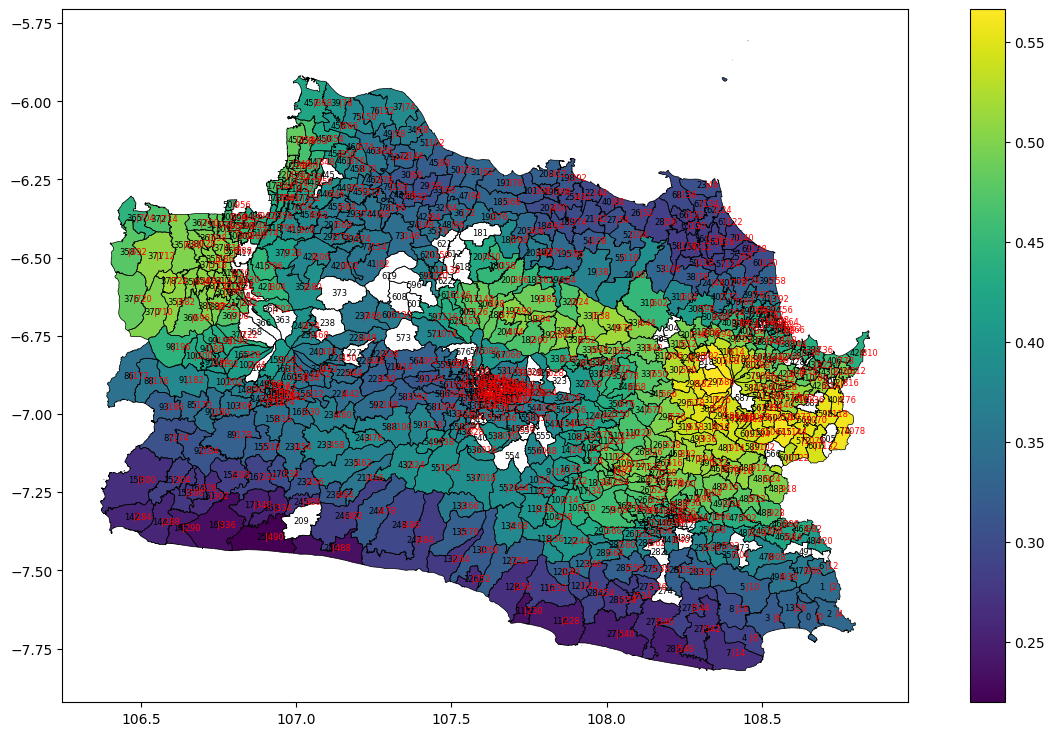

In [65]:
# annual_data_2019 = annual_data[annual_data['tahun'] == 2019]
fig, ax = plt.subplots(figsize=(16, 9))
shp_jabar.boundary.plot(ax=ax, linewidth=0.5, color='black')

selected_data = df_merge[df_merge['tahun'] == 2019]
selected_data.plot(column='precipitation', ax=ax, legend=True)

# Loop through the geometries in shp_jabar to display indices at their centroids
for idx, geometry in enumerate(shp_jabar.geometry):
    # Get the centroid of the geometry to position the index text
    centroid = geometry.centroid
    # if np.isnan(df_merge.iloc[idx]['precipitation']):
        
        # print(f"id:{idx} kabupten: {df_merge.iloc[idx]['nama_kabupaten_kota']}")
        # Place the index text at the centroid
    ax.text(centroid.x, centroid.y, str(idx), fontsize=6, ha='center', va='center', color='black')

for idx, row in selected_data.iterrows():
    # Get the centroid of the geometry
    centroid = row['geometry'].centroid
    
    # Add index text at the centroid position
    ax.text(centroid.x, centroid.y, "        |"+str(idx), fontsize=6, ha='center', va='center', color='red')

# plt.title('Mean Kelembaban Relatif Jawa Barat pada ' +filter_time)

plt.show()

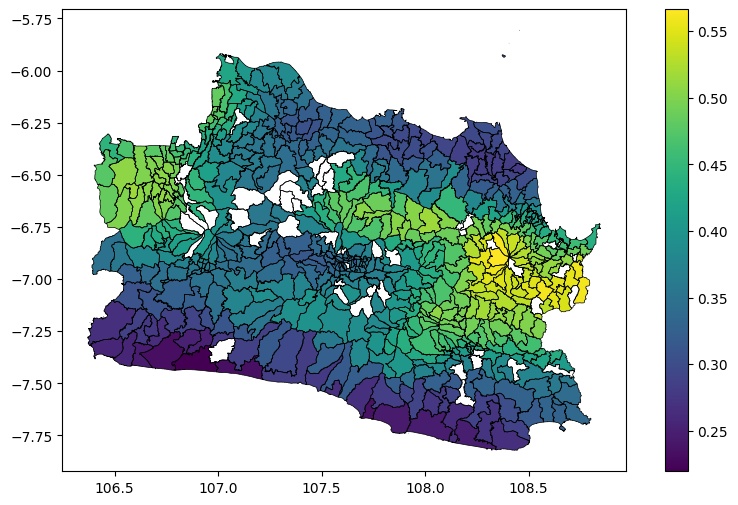

In [32]:
# annual_data_2019 = annual_data[annual_data['tahun'] == 2019]
fig, ax = plt.subplots(figsize=(10, 6))
shp_jabar.boundary.plot(ax=ax, linewidth=0.5, color='black')

df_merge[df_merge['tahun'] == 2019].plot(column='precipitation', ax=ax, legend=True)

# plt.title('Mean Kelembaban Relatif Jawa Barat pada ' +filter_time)
plt.show()

In [ ]:
annual_data

MERGE KODE_KECAMATAN

In [ ]:
df_annual = pd.read_csv("../../hasil/2024 11 DM Stunting/kriging_precipitation_kecamatan.csv")
df_annual

nama_kabupaten_kota nama_kecamatan  tahun  precipitation
0                Bandung       Arjasari   2019       0.396090
1                Bandung       Arjasari   2020       0.319351
2                Bandung      Baleendah   2019       0.374286
3                Bandung      Baleendah   2020       0.301805
4                Bandung       Banjaran   2019       0.388365
...                  ...            ...    ...            ...
1249         Tasikmalaya      Sukaresik   2020       0.385069
1250         Tasikmalaya    Tanjungjaya   2019       0.374431
1251         Tasikmalaya    Tanjungjaya   2020       0.340370
1252         Tasikmalaya         Taraju   2019       0.373061
1253         Tasikmalaya         Taraju   2020       0.347748

[1254 rows x 4 columns]

In [5]:
df_result = pd.merge(df_annual,
                     shp_jabar,
                     left_on=['nama_kecamatan', 'nama_kabupaten_kota'], 
                     right_on=['KECAMATAN', 'KAB_KOTA'], 
                     how='left')

# Menyusun ulang kolom supaya kolom KODE_KEC muncul di posisi yang diinginkan
df_result = df_result[['nama_kabupaten_kota', 'nama_kecamatan', 'KODE_KEC', 'tahun', 'precipitation']]
df_result.columns = ['nama_kabupaten_kota', 'nama_kecamatan', 'id_kecamatan','tahun','precipitation']
df_result


nama_kabupaten_kota nama_kecamatan id_kecamatan  tahun  precipitation
0                Bandung       Arjasari     32.04.16   2019       0.396090
1                Bandung       Arjasari     32.04.16   2020       0.319351
2                Bandung      Baleendah     32.04.32   2019       0.374286
3                Bandung      Baleendah     32.04.32   2020       0.301805
4                Bandung       Banjaran     32.04.13   2019       0.388365
...                  ...            ...          ...    ...            ...
1249         Tasikmalaya      Sukaresik     32.06.39   2020       0.385069
1250         Tasikmalaya    Tanjungjaya     32.06.16   2019       0.374431
1251         Tasikmalaya    Tanjungjaya     32.06.16   2020       0.340370
1252         Tasikmalaya         Taraju     32.06.13   2019       0.373061
1253         Tasikmalaya         Taraju     32.06.13   2020       0.347748

[1254 rows x 5 columns]

In [ ]:
df_result.to_csv("../../hasil/2024 11 DM Stunting/precipitation_kecamatan_kriging.csv", index=False)

MENGUKUR LUAS WILAYAH

In [7]:
# Load the shapefile (replace 'path_to_shapefile.shp' with the actual file path)
# shapefile_path = 'path_to_shapefile.shp'  # Update this path
gdf = shp_desa.copy()

# Check the first few rows and column names
# print(gdf.head())
# print(gdf.columns)
print(gdf.crs)
# Calculate the area of each kecamatan (will be in the units of the coordinate reference system)
# gdf['area'] = gdf.geometry.area

# If the CRS is in degrees lat/lon, you may want to convert to a projected CRS for accurate area
# Example: Converting to UTM or local projected CRS (adjust to your specific area)
gdf = gdf.to_crs(epsg=32748)  # Replace 'your_epsg_code' with the appropriate EPSG code

# Recalculate the area after CRS change
gdf['area'] = gdf.geometry.area/1000000

# Display area results
gdf[['KAB_KOTA','KECAMATAN', 'KEL_DESA','area']]  # Update 'KECAMATAN' to the correct name of your column if different

# Optionally, save the results to a new shapefile or CSV
# gdf.to_file('kecamatan_with_area.shp')  # Save as new shapefile
# or
# gdf[['KECAMATAN', 'area']].to_csv('kecamatan_with_area.csv', index=False)  # Save as CSV


EPSG:4326


KAB_KOTA  KECAMATAN        KEL_DESA       area
0          Tasikmalaya     Cineam           Ancol   5.668450
1           Majalengka     Talaga        Argasari   2.384680
2     Kota Tasikmalaya  Cihideung        Argasari   0.716250
3          Tasikmalaya  Leuwisari        Arjasari   3.885179
4                Garut    Cikelet      Awassagara   5.634566
...                ...        ...             ...        ...
5952           Cianjur    Cibeber   Karangnunggal  15.213281
5953           Bandung   Cileunyi         Cinunuk   5.046061
5954           Bandung   Cileunyi         Cimekar   4.791403
5955           Bandung   Cileunyi  Cileunyi Kulon   5.184529
5956           Bandung   Cileunyi  Cileunyi Wetan   7.859172

[5957 rows x 4 columns]

In [9]:
gdf.describe()

index           FID      TIPE_KD         area
count   5957.000000   5957.000000  5957.000000  5957.000000
mean   21094.589559  21095.589559     1.105254     6.227207
std    16943.071042  16943.071042     0.306907     6.625651
min     1553.000000   1554.000000     1.000000     0.176393
25%     3042.000000   3043.000000     1.000000     2.326711
50%    28381.000000  28382.000000     1.000000     4.224834
75%    30132.000000  30133.000000     1.000000     7.542329
max    82757.000000  82758.000000     2.000000    91.834369

In [13]:
gdf[gdf['area']< 2]

index      FID              NAME  KODE_KEC        KODE_KD KODE_KK   
2      1555   1556.0          Argasari  32.78.01  32.78.01.1004   32.78  \
5      1558   1559.0           Awipari  32.78.06  32.78.06.1009   32.78   
7      1560   1561.0       Babakan Loa  32.05.41  32.05.41.2003   32.05   
9      1562   1563.0         Bagjasari  32.10.03  32.10.03.2010   32.10   
12     1565   1566.0         Balewangi  32.05.20  32.05.20.2007   32.05   
...     ...      ...               ...       ...            ...     ...   
5911  82389  82390.0            Gereba  32.08.16  32.08.16.2002   32.08   
5914  82392  82393.0           Kasturi  32.08.09  32.08.09.2015   32.08   
5921  82399  82400.0            Taraju  32.08.31  32.08.31.2011   32.08   
5922  82400  82401.0        Widarasari  32.08.16  32.08.16.2017   32.08   
5937  82415  82416.0  Cigondewah Hilir  32.04.10  32.04.10.2006   32.04   

     KODE_PROV  TIPE_KD     KECAMATAN          KEL_DESA          KAB_KOTA   
2           32      2.0     Cihideung          Argasari  Kota Tasikmalaya  \
5           32      2.0     Cibeureum           Awipari  Kota Tasikmalaya   
7           32      1.0    Pangatikan       Babakan Loa             Garut   
9           32      1.0      Cikijing         Bagjasari        Majalengka   
12          32      1.0     Cisurupan         Balewangi             Garut   
...        ...      ...           ...               ...               ...   
5911        32      1.0   Kramatmulya            Gereba          Kuningan   
5914        32      1.0      Kuningan           Kasturi          Kuningan   
5921        32      1.0  Sindangagung            Taraju          Kuningan   
5922        32      1.0   Kramatmulya        Widarasari          Kuningan   
5937        32      1.0     Margaasih  Cigondewah Hilir           Bandung   

        PROVINSI   JENIS_KD   
2     Jawa Barat  Kelurahan  \
5     Jawa Barat  Kelurahan   
7     Jawa Barat       Desa   
9     Jawa Barat       Desa   
12    Jawa Barat       Desa   
...          ...        ...   
5911  Jawa Barat       Desa   
5914  Jawa Barat       Desa   
5921  Jawa Barat       Desa   
5922  Jawa Barat       Desa   
5937  Jawa Barat       Desa   

                                               geometry      area  
2     POLYGON Z ((855091.370 9189321.543 0.000, 8550...  0.716250  
5     POLYGON Z ((861687.128 9187081.405 0.000, 8616...  1.658218  
7     POLYGON Z ((831832.642 9207347.604 0.000, 8318...  1.419590  
9     POLYGON Z ((871353.387 9224088.031 0.000, 8713...  1.697122  
12    POLYGON Z ((808085.916 9191990.280 0.000, 8080...  1.414066  
...                                                 ...       ...  
5911  POLYGON Z ((886939.159 9230500.271 0.000, 8869...  0.812699  
5914  POLYGON Z ((886318.547 9230580.921 0.000, 8863...  0.970178  
5921  POLYGON Z ((890166.322 9230865.905 0.000, 8902...  1.155487  
5922  POLYGON Z ((889321.441 9231224.185 0.000, 8893...  1.000090  
5937  POLYGON Z ((782497.896 9231812.520 0.000, 7825...  1.362077  

[1180 rows x 15 columns]

In [5]:
file_geo = "E:/PROJECT/SHP/batas-administrasi-indonesia-master/Kel_Desa/Kel_Desa.shp"

shp_desa = gpd.read_file(file_geo)
shp_desa = shp_desa[shp_desa.PROVINSI == 'Jawa Barat'].reset_index()
shp_desa

index      FID            NAME  KODE_KEC        KODE_KD KODE_KK   
0      1553   1554.0           Ancol  32.06.20  32.06.20.2007   32.06  \
1      1554   1555.0        Argasari  32.10.04  32.10.04.2005   32.10   
2      1555   1556.0        Argasari  32.78.01  32.78.01.1004   32.78   
3      1556   1557.0        Arjasari  32.06.28  32.06.28.2001   32.06   
4      1557   1558.0      Awassagara  32.05.30  32.05.30.2010   32.05   
...     ...      ...             ...       ...            ...     ...   
5952  82753  82754.0   Karangnunggal  32.03.03  32.03.03.2011   32.03   
5953  82754  82755.0         Cinunuk  32.04.05  32.04.05.2004   32.04   
5954  82755  82756.0         Cimekar  32.04.05  32.04.05.2003   32.04   
5955  82756  82757.0  Cileunyi Kulon  32.04.05  32.04.05.2001   32.04   
5956  82757  82758.0  Cileunyi Wetan  32.04.05  32.04.05.2002   32.04   

     KODE_PROV  TIPE_KD  KECAMATAN        KEL_DESA          KAB_KOTA   
0           32      1.0     Cineam           Ancol       Tasikmalaya  \
1           32      1.0     Talaga        Argasari        Majalengka   
2           32      2.0  Cihideung        Argasari  Kota Tasikmalaya   
3           32      1.0  Leuwisari        Arjasari       Tasikmalaya   
4           32      1.0    Cikelet      Awassagara             Garut   
...        ...      ...        ...             ...               ...   
5952        32      1.0    Cibeber   Karangnunggal           Cianjur   
5953        32      1.0   Cileunyi         Cinunuk           Bandung   
5954        32      1.0   Cileunyi         Cimekar           Bandung   
5955        32      1.0   Cileunyi  Cileunyi Kulon           Bandung   
5956        32      1.0   Cileunyi  Cileunyi Wetan           Bandung   

        PROVINSI   JENIS_KD                                           geometry  
0     Jawa Barat       Desa  POLYGON Z ((108.38085 -7.35549 0.00000, 108.38...  
1     Jawa Barat       Desa  POLYGON Z ((108.34628 -6.98710 0.00000, 108.34...  
2     Jawa Barat  Kelurahan  POLYGON Z ((108.21554 -7.32256 0.00000, 108.21...  
3     Jawa Barat       Desa  POLYGON Z ((108.10845 -7.32930 0.00000, 108.10...  
4     Jawa Barat       Desa  POLYGON Z ((107.73229 -7.57652 0.00000, 107.73...  
...          ...        ...                                                ...  
5952  Jawa Barat       Desa  POLYGON Z ((107.19524 -6.90101 0.00000, 107.19...  
5953  Jawa Barat       Desa  POLYGON Z ((107.74356 -6.90703 0.00000, 107.74...  
5954  Jawa Barat       Desa  POLYGON Z ((107.74593 -6.90346 0.00000, 107.74...  
5955  Jawa Barat       Desa  POLYGON Z ((107.74941 -6.90059 0.00000, 107.74...  
5956  Jawa Barat       Desa  POLYGON Z ((107.75262 -6.89466 0.00000, 107.75...  

[5957 rows x 14 columns]

In [ ]:
file_geo = "E:/PROJECT/SHP/batas-administrasi-indonesia-master/Kecamatan/Kecamatan.shp"
shp_lain = gpd.read_file(file_geo)
shp_lain = shp_lain[shp_lain.PROVINSI == 'Jawa Barat'].reset_index()
shp_lain